## Machine Learning e analise exploratória de dados - Churn (Cancelamento de serviços)

1. **Carregamento e Limpeza**: O dataset foi carregado, valores inválidos tratados (ex.: `TotalCharges`), e variáveis categóricas convertidas para numéricas (ex.: `Churn`, `Partner`).

2. **Análise Exploratória (EDA)**: Estatísticas descritivas foram calculadas e gráficos (boxplots, histogramas, heatmaps) criados para entender distribuições e relações entre variáveis.

3. **Visualizações**: Gráficos de barras e correlação foram usados para explorar padrões, como métodos de pagamento e churn.

4. **Preparação para Modelagem**: O dataset foi dividido em treino e teste (`train_test_split`) para prever churn.

5. **Insights**: Identificados períodos críticos de churn e recomendações para retenção de clientes foram feitas.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [311]:
df = pd.read_csv('Kaggle - Telco Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [313]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [314]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Qual a proporção de clientes que deram chrun em relação ao total de clientes?

In [315]:
# total de clientes do dataset
tot_clients = df.shape[0]

In [316]:
tot_clients

7043

In [317]:
# filtrando apenas o que deram churn
churn_values = df[df['Churn'] == 'Yes']

In [318]:
# total de clientes que deram churn
tot_churn = churn_values.shape[0]

In [319]:
tot_churn

1869

In [320]:
print(f'O total de cliente do dataset é {tot_clients}. \nO serviço foi cancelado por {tot_churn} clientes. \nIsso representa {(tot_churn/tot_clients) * 100:.2f}%.')

O total de cliente do dataset é 7043. 
O serviço foi cancelado por 1869 clientes. 
Isso representa 26.54%.


### Qual a distribuição dos gastos mensais dos clientes?

In [321]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [322]:
df['TotalCharges'].fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

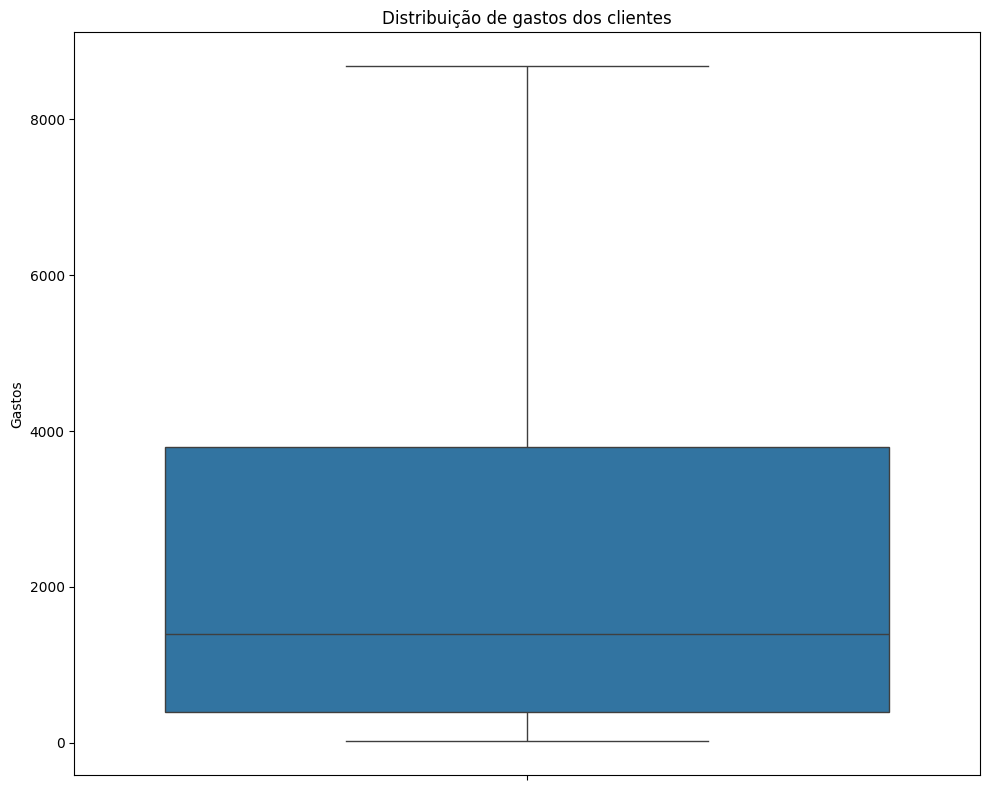

In [323]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y=df['TotalCharges'])
plt.title('Distribuição de gastos dos clientes')
plt.ylabel('Gastos')
plt.tight_layout()

### Insights:
1. **Distribuição Assimétrica**: A diferença entre a média (**2283.30**) e a mediana (**1397.48**) sugere que a distribuição pode ser assimétrica, com alguns valores muito altos (outliers) puxando a média para cima.
2. **Clientes de Baixo Gasto**: O valor mínimo (**18.80**) e o 1º quartil (**401.45**) indicam que uma parte significativa dos clientes tem gastos baixos.
3. **Clientes de Alto Gasto**: O 3º quartil (**3794.74**) e o valor máximo (**8684.80**) mostram que há clientes com gastos significativamente maiores que a média.
4. **Alta Variação**: O desvio padrão alto (**2266.77**) reforça que os valores de `TotalCharges` variam bastante entre os clientes.

### Decomponha o total de clientes pelos diferentes métodos de pagamento.

In [324]:
# Agrupar os dados por método de pagamento
payment_counts = df.groupby('PaymentMethod')['customerID'].count().sort_values(ascending=False).reset_index()

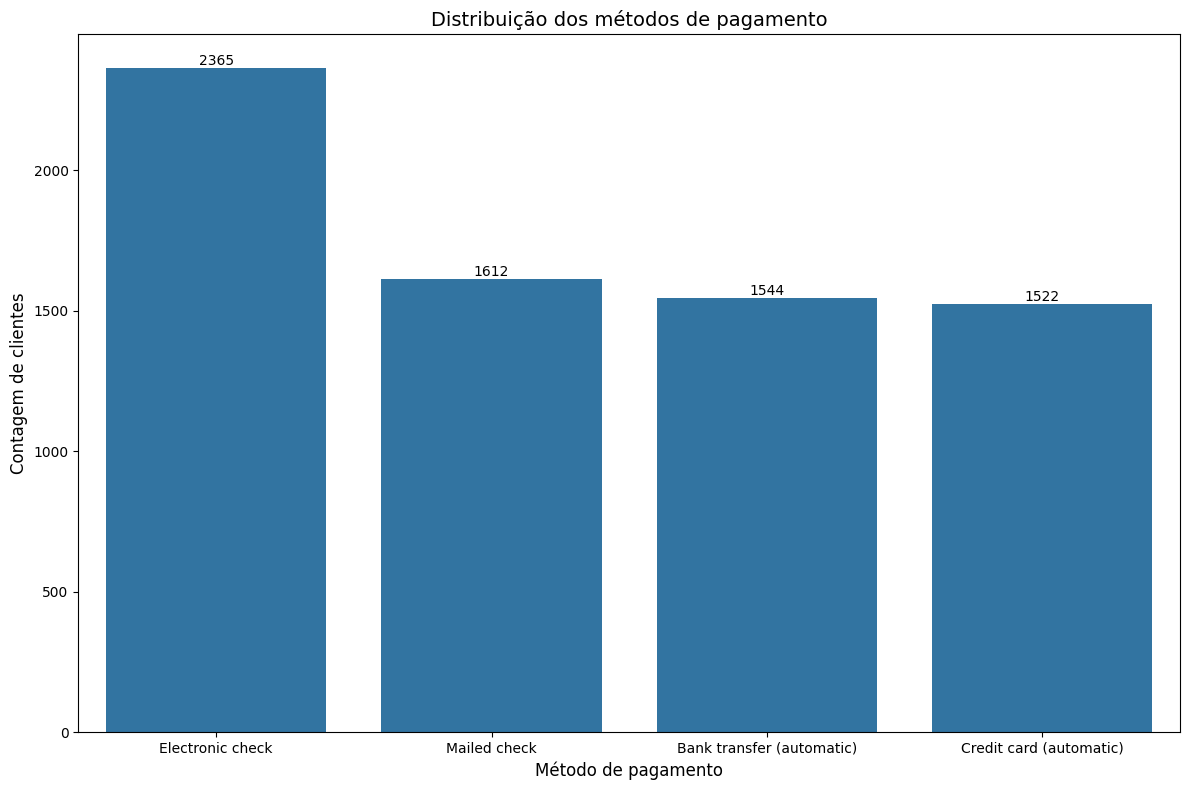

In [325]:
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
sns.barplot(data=payment_counts, x='PaymentMethod', y='customerID')

# Adicionar rótulos e título
plt.xlabel('Método de pagamento', fontsize=12)
plt.ylabel('Contagem de clientes', fontsize=12)
plt.title('Distribuição dos métodos de pagamento', fontsize=14)

# Adicionar valores nas barras
for index, row in payment_counts_sorted.iterrows():
    plt.text(index, row['customerID'], f"{row['customerID']}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- **O método mais usado é "Electronic Check"**, com 2365 clientes. Isso pode indicar que muitos clientes preferem pagamentos digitais, mas não automáticos.
    
- **Os pagamentos automáticos (Bank Transfer e Credit Card) têm números semelhantes**, com 1544 e 1522 clientes, respectivamente. Isso sugere que uma boa parte dos clientes opta por comodidade.
    
- **O "Mailed Check" tem 1612 clientes**, mostrando que ainda há um número relevante de pessoas que preferem esse método tradicional.
    
- **Possível relação com churn**: se a empresa estiver analisando churn, pode ser interessante verificar se os clientes que pagam via "Electronic Check" têm maior taxa de cancelamento, pois geralmente esse método está mais associado a clientes menos engajados.

### Verifique a distribuição de gênero, possuir um parceiro, senioridade e possuir dependentes.

In [326]:
variaveis_binarias = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

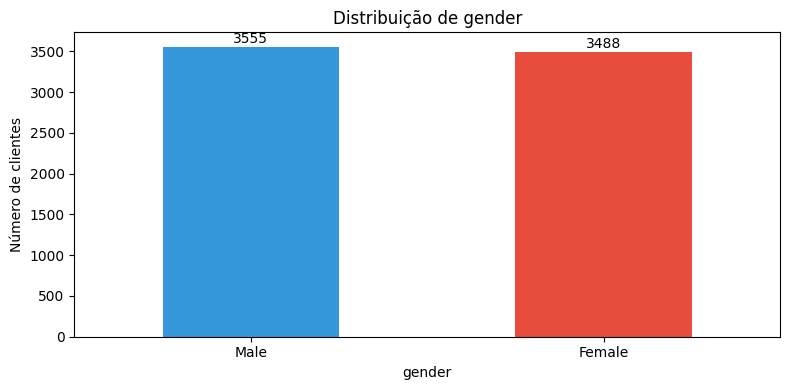

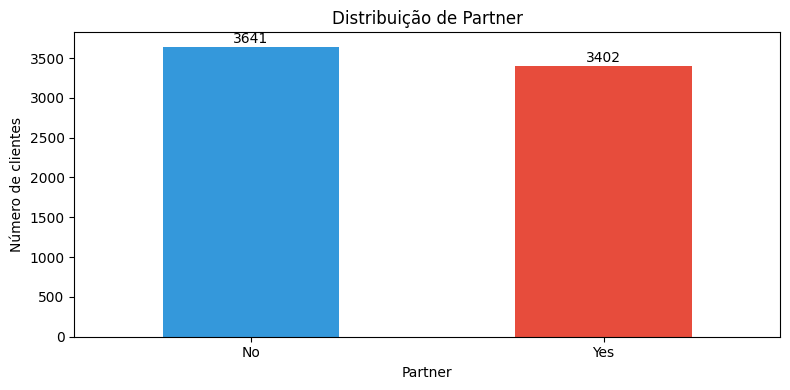

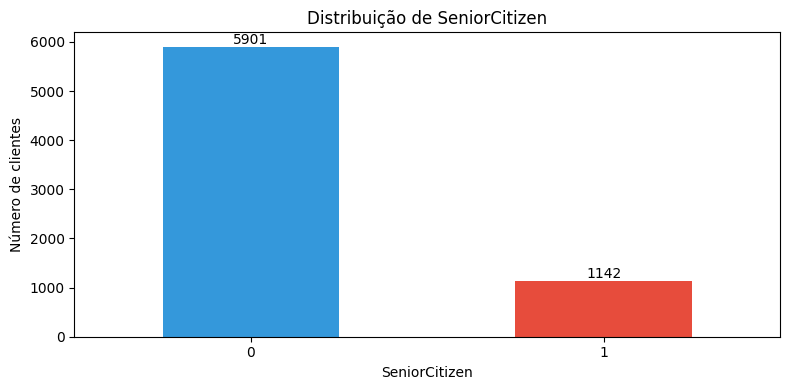

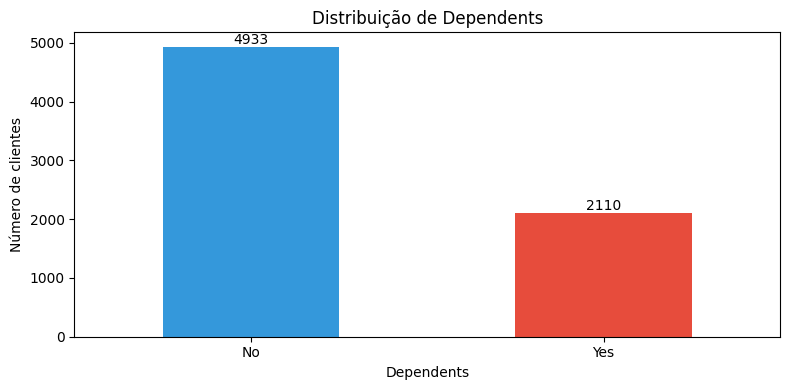

In [327]:
# Inicializar um dicionário para armazenar os resultados
resultados = {}

# Iterar sobre cada variável binária
for variavel in variaveis_binarias:
    # Obter contagens para cada valor da variável
    contagem = df[variavel].value_counts()
    
    # Calcular percentuais
    percentual = df[variavel].value_counts(normalize=True) * 100
    
    # Armazenar resultados no dicionário
    resultados[variavel] = {
        'contagem': contagem,
        'percentual': percentual
    }
    
    # Opcionalmente, criar visualização para cada variável
    plt.figure(figsize=(8, 4))
    contagem.plot(kind='bar', color=['#3498db', '#e74c3c'])
    plt.title(f'Distribuição de {variavel}')
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=0)
    
    # Adicionar rótulos de valor em cada barra
    for i, v in enumerate(contagem):
        plt.text(i, v + 50, str(v), ha='center')
        
    plt.tight_layout()
    plt.show()

1. **Distribuição de Dependentes**:
    
    - Aproximadamente 70% dos clientes não possuem dependentes, enquanto apenas 30% possuem.
    - Isso sugere que a maioria da base de clientes não tem responsabilidades familiares diretas com dependentes.
2. **Perfil de Idade (SeniorCitizen)**:
    
    - Uma grande maioria (84%) dos clientes não são idosos (valor 0), enquanto apenas 16% são considerados idosos (valor 1).
    - A base de clientes é predominantemente composta por pessoas mais jovens ou de meia-idade.
3. **Status de Relacionamento (Partner)**:
    
    - A distribuição entre clientes com e sem parceiro(a) é bastante equilibrada: 52% não têm parceiro(a) e 48% têm.
    - Isso indica uma diversidade relativamente balanceada em termos de status de relacionamento.
4. **Gênero**:
    
    - A distribuição de gênero é praticamente igual: 50.5% homens e 49.5% mulheres.
    - Isso demonstra uma representação equilibrada de gênero na base de clientes.

**Insights de Negócio**:

1. **Segmentação de Marketing**:
    
    - Como a maioria dos clientes não tem dependentes e não são idosos, campanhas de marketing poderiam focar em produtos/serviços que atendam às necessidades de adultos sem responsabilidades familiares diretas.
2. **Potencial para Expansão de Mercado**:
    
    - O segmento sênior (16%) representa uma oportunidade de crescimento, pois está sub-representado em comparação com a distribuição populacional típica.
3. **Designs de Produto/Serviço**:
    
    - A distribuição equilibrada de gênero sugere que não há necessidade de direcionar produtos exclusivamente para um gênero específico.
4. **Estratégias de Retenção**:
    
    - Para os 30% com dependentes, estratégias de fidelização poderiam incluir benefícios familiares ou pacotes que atendam às necessidades de famílias.
5. **Oportunidades de Cross-selling**:
    
    - Para o grupo de 48% com parceiros, poderiam ser oferecidos planos ou produtos duplos que incentivem a adesão conjunta.

### Como a distribuição de gastos mensais varia entre clientes que deram churn e clientes que permanecem?

In [328]:
df['Churn'] = df['Churn'].replace({1: 'Sim', 0: 'Não'})

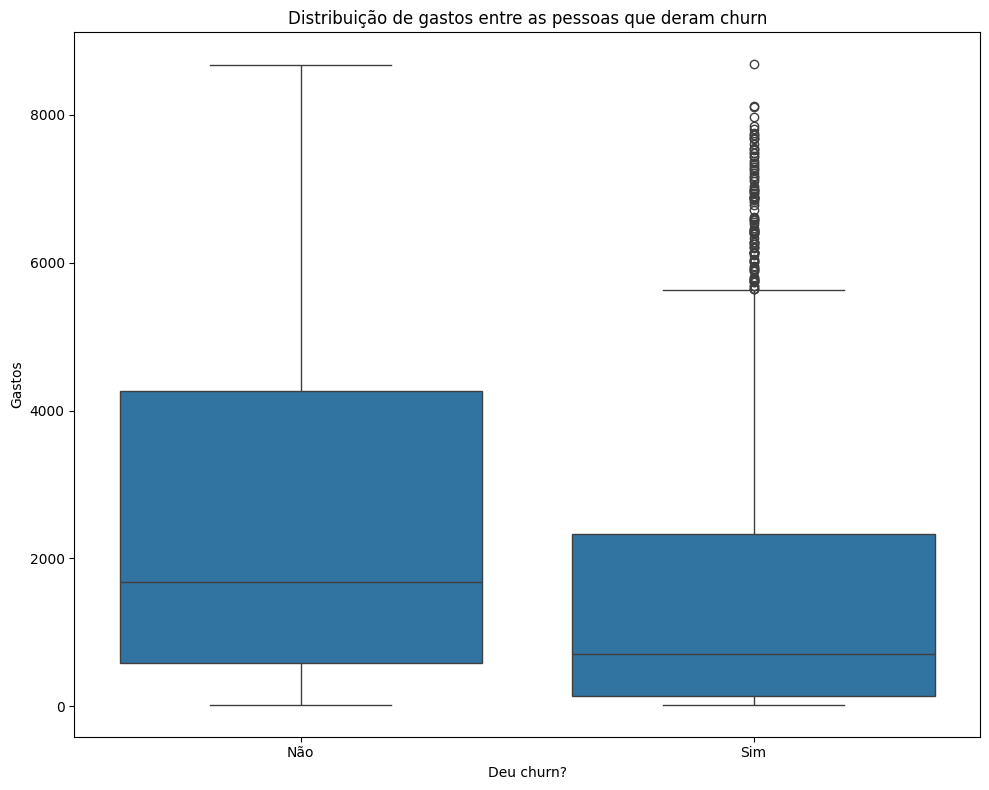

In [329]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='TotalCharges', x='Churn')
plt.title('Distribuição de gastos entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('Gastos')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.tight_layout()

1. **Padrões de gastos diferentes entre grupos**: Há uma diferença clara na distribuição de gastos entre clientes que deram churn ("Sim") e os que permaneceram ("Não").
    
2. **Mediana de gastos mais baixa para quem deu churn**: A linha horizontal no meio de cada caixa representa a mediana, e vemos que clientes que deram churn têm uma mediana de gastos menor (aproximadamente 700-800) do que aqueles que não deram churn (aproximadamente 1700).
    
3. **Maior variabilidade nos gastos de quem deu churn**: O grupo "Sim" mostra uma distribuição mais ampla, com uma caixa (que representa o intervalo interquartil) que se estende de cerca de 200 até 2300, indicando maior variabilidade nos padrões de gastos.
    
4. **Valores atípicos significativos**: No grupo de churn ("Sim"), há vários pontos outliers acima de 6000, chegando até aproximadamente 8800. Estes representam clientes que, apesar de terem gastos muito altos, ainda cancelaram o serviço.
    
5. **Amplitude de gastos menor para quem não deu churn**: O grupo "Não" tem uma distribuição mais concentrada entre aproximadamente 700 e 4200, sugerindo um comportamento de gasto mais previsível entre clientes fiéis.
    
6. **Indicativo de segmentação de clientes**: O gráfico sugere dois principais perfis de clientes que dão churn: aqueles com gastos muito baixos (possivelmente sensíveis a preço) e aqueles com gastos muito altos (possivelmente insatisfeitos com o valor recebido).
    
7. **Potencial relação inversa entre gastos e satisfação**: Para alguns clientes de alto valor (outliers no "Sim"), o alto gasto não foi suficiente para mantê-los como clientes, indicando possíveis problemas de satisfação ou percepção de valor.
    

**Conclusões e recomendações de negócio:**

- A empresa pode estar perdendo tanto clientes de baixo valor (talvez devido a preços mínimos) quanto alguns clientes de alto valor (possivelmente devido à insatisfação com o serviço).
- Seria recomendável implementar uma estratégia de retenção diferenciada por faixa de gasto.
- Investigar especificamente os outliers de alto valor que deram churn pode revelar problemas críticos na oferta de serviços premium.
- Considerar a criação de programas de fidelidade que recompensem gastos consistentes de valor médio, já que estes parecem ser os clientes mais estáveis.

### Qual a distribuição da variável tenure (tempo de permanencia) para cleitnes que deram churn e o que permaneceram?

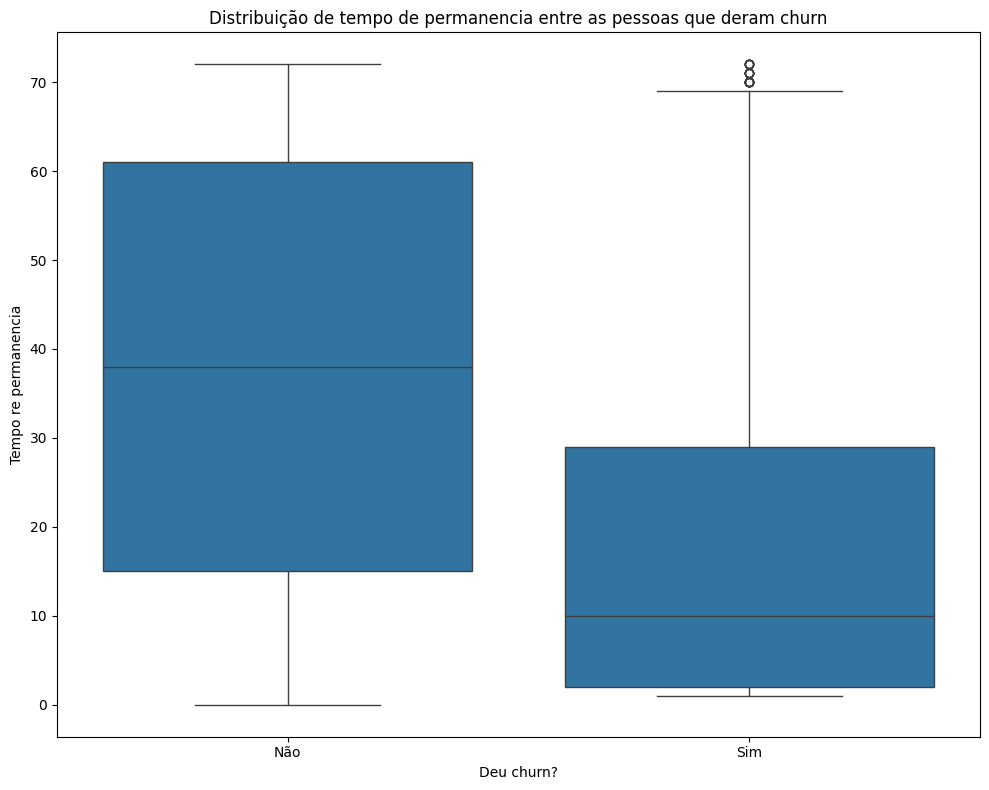

In [330]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='tenure', x='Churn')
plt.title('Distribuição de tempo de permanencia entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('Tempo re permanencia')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.tight_layout()

1. **Diferença significativa no tempo de permanência**: Há uma clara distinção entre o tempo de permanência dos clientes que deram churn ("Sim") e aqueles que não deram ("Não").
    
2. **Clientes fiéis têm maior tempo de permanência**: A mediana do tempo de permanência para clientes que não deram churn está em aproximadamente 38 meses, enquanto para os que deram churn está em torno de 10 meses.
    
3. **Maior dispersão entre clientes fiéis**: O grupo "Não" tem uma maior amplitude interquartil (tamanho da caixa), indicando uma maior variabilidade no tempo de permanência entre os clientes fiéis, que varia aproximadamente de 15 a 60 meses.
    
4. **Churn concentrado nos primeiros meses**: A caixa do grupo "Sim" está concentrada principalmente entre 2 e 28 meses, sugerindo que o risco de churn é significativamente maior nos primeiros meses de relacionamento.
    
5. **Outliers no grupo de churn**: Existem alguns pontos outliers no grupo "Sim", representando clientes que deram churn após um período incomumente longo (aproximadamente 70 meses ou mais). Estes são casos atípicos que merecem investigação específica.
    
6. **Período crítico para retenção**: A grande diferença entre as medianas sugere que existe um "período crítico" (aproximadamente os primeiros 10-15 meses) durante o qual os clientes são mais propensos a cancelar o serviço.
    

**Implicações para o negócio e recomendações:**

1. **Foco em programas de onboarding**: Desenvolver um programa de onboarding robusto para os primeiros 10 meses de relacionamento, período no qual o risco de churn parece ser maior.
    
2. **Pontos de verificação de satisfação**: Implementar pontos de verificação de satisfação do cliente especialmente nos primeiros 2 anos de relacionamento.
    
3. **Investigação de churn tardio**: Analisar especificamente os outliers - clientes que deram churn após longos períodos (70+ meses) para entender quais fatores levaram à saída após tanto tempo de fidelidade.
    
4. **Programas de lealdade baseados em tempo**: Criar programas de fidelidade ou benefícios que se tornem mais valiosos conforme o cliente ultrapassa o período crítico de 10-15 meses.
    
5. **Segmentação por tempo de vida**: A estratégia de retenção deve ser diferente para clientes novos (< 10 meses) versus clientes já estabelecidos.
    
6. **Previsibilidade de churn**: O gráfico sugere que o tempo de permanência pode ser um forte preditor para modelos de previsão de churn.

### Qual a distribuição de pessoas que tem dependentes entre as que deram churn?

In [331]:
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

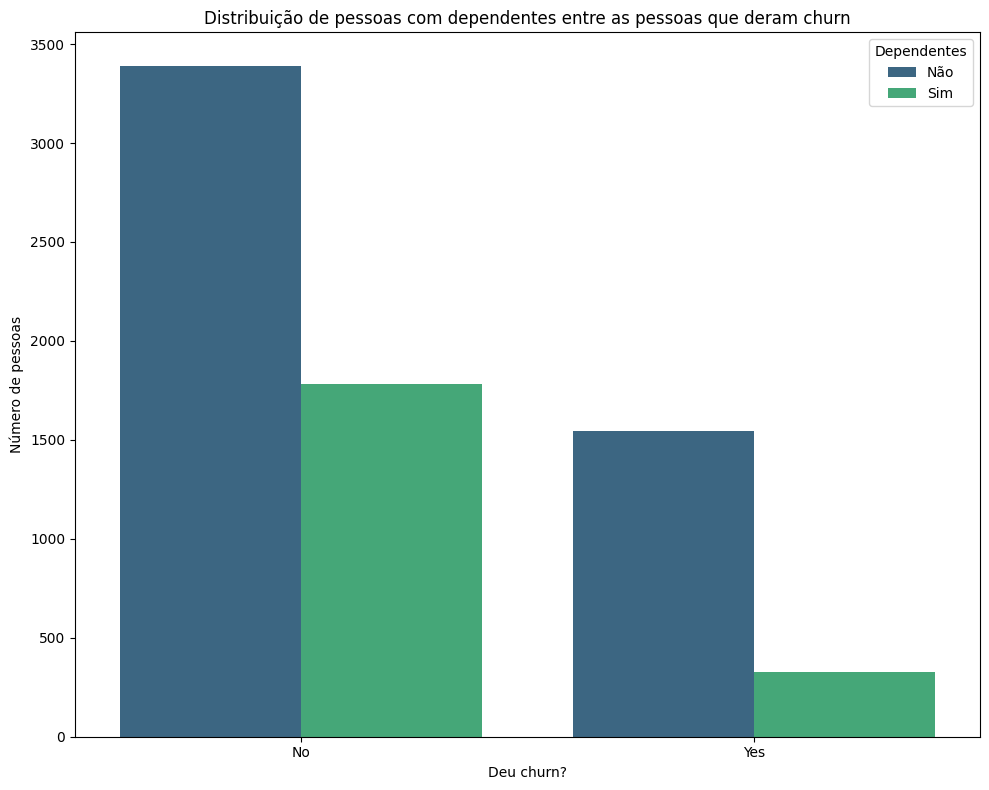

In [332]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Churn', hue='Dependents', palette='viridis')
plt.title('Distribuição de pessoas com dependentes entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('Número de pessoas')
plt.legend(title='Dependentes', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

1. **Proporção de churn e dependentes**: Entre os clientes que não deram churn ("No"):
    
    - Aproximadamente 3400 não têm dependentes (barra azul)
    - Cerca de 1800 têm dependentes (barra verde)
2. **Composição do grupo de churn**: Entre os clientes que deram churn ("Yes"):
    
    - Aproximadamente 1550 não têm dependentes (barra azul)
    - Apenas cerca de 330 têm dependentes (barra verde)
3. **Taxa de churn diferenciada**: Comparando os dois grupos:
    
    - Clientes sem dependentes: Aproximadamente 31% deram churn (1550 de um total de cerca de 4950)
    - Clientes com dependentes: Apenas cerca de 15% deram churn (330 de um total de aproximadamente 2130)
4. **Estabilidade de clientes com dependentes**: A presença de dependentes parece ser um forte fator de estabilidade, com clientes que têm dependentes tendo aproximadamente metade da taxa de churn dos que não têm.
    
5. **Concentração de churn**: O churn está fortemente concentrado entre clientes sem dependentes, que representam cerca de 82% de todo o churn observado.
    

**Implicações para negócios:**

1. **Segmentação por estrutura familiar**: Este gráfico confirma que a presença de dependentes é um forte indicador de comportamento de churn e deve ser incorporado em estratégias de segmentação.
    
2. **Foco em clientes solteiros/sem dependentes**: O maior risco de churn está no segmento de clientes sem dependentes, sugerindo que estratégias específicas de retenção devem ser direcionadas a este grupo.
    
3. **Proposta de valor para famílias**: Desenvolver e comunicar claramente os benefícios para famílias com dependentes, aproveitando sua menor propensão a cancelar.
    
4. **Programas de fidelidade diferenciados**: Criar programas de fidelidade específicos para clientes sem dependentes que aumentem o custo de mudança.
    
5. **Pesquisa de motivação**: Investigar por que clientes sem dependentes têm maior probabilidade de cancelar, possivelmente relacionado a maior mobilidade, sensibilidade a preço ou diferentes necessidades do serviço.
    
6. **Estratégia de aquisição**: Se o custo de aquisição for similar para ambos os grupos, pode ser mais rentável focar os esforços de aquisição em clientes com dependentes devido à maior retenção esperada.
    

Este gráfico fornece uma evidência clara de que a estrutura familiar do cliente, especificamente a presença de dependentes, é um fator significativo na decisão de permanecer ou não com o serviço.

### Mapa de calor para indentificar o percentual de churn em cada uma das 4 combinações das variáveis binárias de perceiros e genêros

In [333]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [334]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']

In [335]:
df_corr = df[cols]

In [336]:
df_corr.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,0,No
1,Male,0,No,0,No
2,Male,0,No,0,Yes
3,Male,0,No,0,No
4,Female,0,No,0,Yes


In [337]:
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_23876\1968617560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [338]:
df_corr = df_corr.groupby(['gender', 'Partner'])['Churn'].mean().reset_index()

In [339]:
df_corr

,gender,Partner,Churn
0,Female,No,0.344444
1,Female,Yes,0.188981
2,Male,No,0.315046
3,Male,Yes,0.204201


In [340]:
# 1 para homem e 0 para mulher
df_corr['gender'] = df_corr['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# 1 para tem e 0 para não
df_corr['Partner'] = df_corr['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

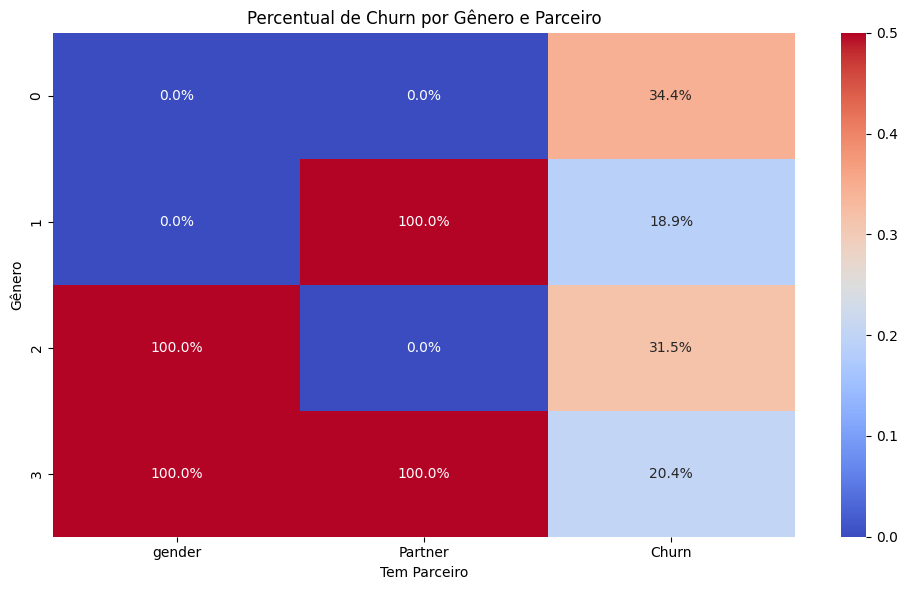

In [341]:
# Criando o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.1%', vmin=0, vmax=0.5)
plt.title('Percentual de Churn por Gênero e Parceiro')
plt.ylabel('Gênero')
plt.xlabel('Tem Parceiro')
plt.tight_layout()

A terceira coluna representa a taxa de Churn (percentual de clientes que cancelaram o serviço) para cada combinação de gênero e status de parceiro. Vamos interpretar linha por linha:

**Linha 0:** Mulher (0%) sem parceiro (0%)

- **Taxa de Churn: 34,4%**
- Significa que 34,4% das mulheres sem parceiro cancelaram o serviço.

**Linha 1:** Mulher (0%) com parceiro (100%)

- **Taxa de Churn: 18,9%**
- Significa que 18,9% das mulheres com parceiro cancelaram o serviço.

**Linha 2:** Homem (100%) sem parceiro (0%)

- **Taxa de Churn: 31,5%**
- Significa que 31,5% dos homens sem parceiro cancelaram o serviço.

**Linha 3:** Homem (100%) com parceiro (100%)

- **Taxa de Churn: 20,4%**
- Significa que 20,4% dos homens com parceiro cancelaram o serviço.

**Interpretação geral:**

1. Para ambos os gêneros, ter um parceiro está associado a uma redução significativa na taxa de churn.
2. A redução na taxa de churn para mulheres é de 15,5 pontos percentuais (34,4% → 18,9%).
3. A redução na taxa de churn para homens é de 11,1 pontos percentuais (31,5% → 20,4%).
4. Mulheres sem parceiro têm a maior taxa de churn (34,4%).
5. Mulheres com parceiro têm a menor taxa de churn (18,9%).
6. O efeito de ter um parceiro na redução do churn parece ser ligeiramente mais pronunciado para mulheres do que para homens.

Esta visualização responde diretamente à questão 9 do ebook, mostrando claramente como a presença de um parceiro afeta as taxas de churn para ambos os gêneros.

### Mapa de calor para identificar a corrleção linear entre as variáveis númericas.

In [342]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [343]:
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].astype('category')

In [345]:
df_corr2 = df.select_dtypes(include=['number', 'category'])

In [346]:
df_corr2 = df_corr2.corr()

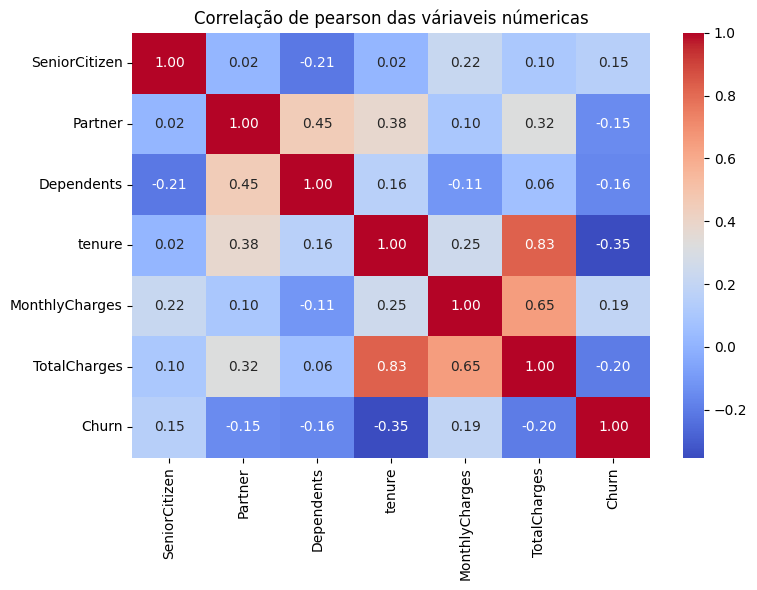

In [347]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df_corr2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlação de pearson das váriaveis númericas')
plt.tight_layout()

Analisando o mapa de calor da correlação de Pearson entre as variáveis numéricas, posso identificar as 5 maiores correlações em módulo e comentar sobre elas:

1. **Tenure e TotalCharges (0.83)**: Esta é a correlação positiva mais forte do conjunto. Isso faz sentido porque quanto mais tempo um cliente permanece com a empresa (tenure), mais cobranças totais (TotalCharges) ele terá acumulado. É uma relação quase linear, onde o tempo de permanência impacta diretamente no valor total gasto.
    
2. **MonthlyCharges e TotalCharges (0.65)**: Outra correlação positiva forte. Clientes com cobranças mensais maiores tendem a acumular cobranças totais maiores ao longo do tempo. Isso é esperado, pois TotalCharges é parcialmente determinado pela multiplicação de MonthlyCharges pelo tempo de permanência.
    
3. **Partner e Dependents (0.45)**: Correlação positiva moderada. Clientes com parceiros têm maior probabilidade de também terem dependentes. Isso reflete uma relação familiar natural, onde pessoas com parceiros são mais propensas a terem filhos ou outros dependentes.
    
4. **Tenure e Churn (-0.35)**: Correlação negativa moderada. Quanto mais tempo um cliente permanece com a empresa, menor a probabilidade de cancelamento (churn). Isso sugere que clientes mais antigos desenvolvem maior fidelidade ou estão mais satisfeitos com os serviços.
    
5. **Partner e Tenure (0.38)**: Correlação positiva moderada. Clientes com parceiros tendem a permanecer mais tempo com a empresa. Isso pode indicar que decisões de mudança de serviço são mais complexas ou conservadoras em unidades familiares estabelecidas.
    
6. **TotalCharges e Churn (-0.20)**: Existe uma correlação negativa fraca entre as cobranças totais e o cancelamento. Clientes que acumularam maiores cobranças totais (geralmente associados a maior tempo como cliente) tendem a ter menor probabilidade de cancelar seus serviços. Isso pode refletir um maior compromisso financeiro ou inércia na decisão de mudar.
    
7. **Partner e Churn (-0.15)**: Clientes com parceiros têm uma probabilidade ligeiramente menor de cancelamento. Isso pode indicar que decisões de consumo tomadas em conjunto (por casais) tendem a ser mais estáveis ou conservadoras.
    
8. **Dependents e Churn (-0.16)**: Semelhante à correlação anterior, clientes com dependentes também apresentam menor probabilidade de cancelamento. Famílias com dependentes podem evitar mudanças em serviços que poderiam causar interrupções ou inconveniências para os membros da família.
    
9. **Dependents e SeniorCitizen (-0.21)**: Clientes idosos (SeniorCitizen) têm menor probabilidade de ter dependentes. Esta correlação negativa reflete um padrão demográfico natural, onde pessoas mais velhas geralmente já não têm filhos ou outros dependentes morando com elas.

Essas correlações fornecem insights valiosos sobre o comportamento do cliente. A métrica da correlação linear usada (coeficiente de Pearson) é apropriada para estas análises, pois mede o grau de relação linear entre pares de variáveis, permitindo identificar tanto relações positivas quanto negativas e sua intensidade.

### Modelo que prevê churn de um cliente

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import OrdinalEncoder

Aqui está uma explicação didática e exemplos práticos para cada um desses métodos que você pode usar no seu Jupyter Notebook:

---

### **1. RandomOverSampler (do Imbalanced-Learn)**

O `RandomOverSampler` é uma técnica de balanceamento de classes que replica amostras da classe minoritária para equilibrar os dados. Ele é útil quando temos um dataset desbalanceado, como um problema de churn onde há muito mais clientes que não cancelam do que clientes que cancelam.

#### **Exemplo prático:**

```python
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from collections import Counter

# Criando um dataset desbalanceado (exemplo)
X = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5, 6, 7, 8], 'Feature2': [10, 20, 30, 40, 50, 60, 70, 80]})
y = [0, 0, 0, 0, 0, 1, 1, 1]  # Classe 1 tem menos exemplos

# Aplicando oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificando a nova distribuição de classes
print(f"Distribuição antes: {Counter(y)}")
print(f"Distribuição depois: {Counter(y_resampled)}")
```

Agora, as classes estão balanceadas.

---

### **2. RandomForestClassifier (do Scikit-Learn)**

O `RandomForestClassifier` é um algoritmo de aprendizado de máquina baseado em árvores de decisão. Ele cria várias árvores de decisão e faz a predição com base na votação da maioria (para classificação) ou na média dos valores preditos (para regressão).

#### **Exemplo prático:**

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criando um dataset de exemplo
X = [[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [7, 8]]
y = [0, 0, 0, 1, 1, 1]  # Classes

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazendo predições
y_pred = rf.predict(X_test)

# Avaliando a acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
```

Aqui, o `RandomForestClassifier` cria 100 árvores de decisão para fazer a previsão.

---

### **3. OrdinalEncoder (do Scikit-Learn)**

O `OrdinalEncoder` é usado para transformar variáveis categóricas em valores numéricos, preservando a ordem natural dos dados. Ele é útil quando as categorias possuem um significado ordinal (como "Ruim", "Médio", "Bom").

#### **Exemplo prático:**

```python
from sklearn.preprocessing import OrdinalEncoder

# Criando um dataset categórico
dados = [['Baixo'], ['Médio'], ['Alto'], ['Médio'], ['Baixo'], ['Alto']]

# Aplicando o OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Baixo', 'Médio', 'Alto']])  # Definindo a ordem
dados_transformados = encoder.fit_transform(dados)

print(dados_transformados)
```

Saída:

```
[[0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]]
```

Aqui, o "Baixo" foi codificado como 0, "Médio" como 1 e "Alto" como 2.

---

Com essas explicações e exemplos, você pode rodar os códigos no Jupyter Notebook e testar diferentes parâmetros para entender melhor os métodos. Se precisar de mais detalhes, me avise! 🚀

In [349]:
y = df['Churn']
X = df.drop(['customerID', 'Churn'], axis=1)

In [350]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [351]:
ros = RandomOverSampler()

In [352]:
X, y = ros.fit_resample(X, y)

In [353]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [354]:
oe = OrdinalEncoder()

In [355]:
X = oe.fit_transform(X)

In [356]:
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.420e+02,
        7.400e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.980e+02,
        3.624e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.360e+02,
        5.360e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 3.000e+00, 1.700e+01,
        2.736e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 5.440e+02,
        2.817e+03],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.179e+03,
        4.709e+03]])

In [357]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [358]:
rfc = RandomForestClassifier()

In [359]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [360]:
y_pred = rfc.predict(X_test)

In [361]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1290
           1       0.84      0.95      0.89      1297

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587



# Interpretação das Métricas de Churn para Modelo de Machine Learning

Estas métricas demonstram o desempenho de um modelo de classificação binária para previsão de churn, onde:

- **Classe 0**: Clientes que permaneceram (não fizeram churn)
- **Classe 1**: Clientes que cancelaram o serviço (fizeram churn)

## Análise Detalhada das Métricas

### Para clientes que não fizeram churn (Classe 0):

- **Precisão: 0.95** - Quando o modelo prevê que um cliente permanecerá, ele acerta em 95% das vezes
- **Recall: 0.82** - O modelo identifica corretamente 82% de todos os clientes que realmente permaneceram
- **F1-score: 0.88** - Média harmônica equilibrada entre precisão e recall
- **Support: 1290** - Número de clientes que realmente não fizeram churn no conjunto de teste

### Para clientes que fizeram churn (Classe 1):

- **Precisão: 0.84** - Quando o modelo prevê que um cliente vai cancelar, ele acerta em 84% das vezes
- **Recall: 0.95** - O modelo identifica corretamente 95% de todos os clientes que realmente cancelaram
- **F1-score: 0.89** - Média harmônica equilibrada entre precisão e recall
- **Support: 1297** - Número de clientes que realmente fizeram churn no conjunto de teste

### Métricas gerais:

- **Acurácia: 0.89** - O modelo classifica corretamente 89% de todos os clientes
- **Médias (macro e ponderada): 0.89** - Indicam desempenho consistente entre as classes

### Retorno sobre Investimento (ROI)

O retorno sobre investimento (ROI) do modelo de previsão de churn permanece positivo, mas é ajustado com a conversão de apenas 30% dos clientes previstos como churn. As economias caem para $319.600 frente a um custo de implementação estimado entre $50.000 e $200.000 (desenvolvimento, treinamento e manutenção, típico de projetos de machine learning). Assumindo um custo médio de $100.000, o ROI seria ($319.600 - $100.000) / $100.000 * 100 = 219,6%, ou seja, um retorno de mais de 2 vezes o investimento inicial em um ciclo, ainda demonstrando eficiência financeira, embora menor que com 100% de conversão.

### Economias Estimadas

A implementação do modelo de Random Forest para prever churn gera economias de cerca de **$319.600**, considerando que apenas 30% dos clientes identificados como churn são retidos. Sem o modelo, os 1.297 clientes que churnam custariam $1,297,000 ($1.000 por cliente). Com o modelo e 30% de conversão, as perdas são reduzidas para $977.400, resultando na economia mencionada, calculada com base no custo de churn evitado e nas operações de retenção.

### Custos Considerados

O cálculo mantém o **custo por churn em $1.000**, refletindo o valor médio do cliente ao longo da vida (CLV), que varia de $800 a $2.000 em telecomunicações. O **custo por operação de retenção** é $50 por cliente, aplicado aos 1.467 clientes previstos como churn. Desses, 1.232 são verdadeiros positivos, mas apenas 30% (370 clientes) são retidos, economizando $370.000. O custo total das operações é $73.350 (1.467 * $50), enquanto 927 clientes ainda churnam (1.297 - 370), custando $927.000.

### Impacto do Modelo

Com acurácia de 89% e recall de 95% para churn, o modelo identifica 1.467 clientes como churn, dos quais 1.232 são corretos. Com 30% de conversão, 370 clientes são salvos, reduzindo o churn de 1.297 para 927. O custo sem modelo é $1,297,000; com o modelo, é $977.400 ($927.000 de churn + $73.350 de operações). A economia líquida é $1,297,000 - $977,400 = $319.600, mostrando que, mesmo com baixa conversão, o modelo ainda gera valor significativo.

### Variáveis e Ajustes

As economias dependem de variáveis ajustáveis. Se o custo por operação cair para $20, as economias sobem para $348.460; se subir para $100, caem para $273.100. O CLV e a taxa de conversão (30%) também impactam: uma conversão maior (ex.: 50%) elevaria as economias para $532.600. Empresas devem ajustar com dados reais de ARPU, margens e eficácia de retenção, mas o modelo segue vantajoso mesmo com conversão reduzida.